# Analysis

In [ ]:
# 0/ It was found necessary to first plot an additional graph (long vs lat) to locate the cities and better understand if the random selection
# was accounting for most of the surface of the earth, which seems to be the case.

# 1/ Most of the data are located on the right part of the plots, on the positive axis which correlates directly
# with the amount of apparent and emerged land area on earth suggesting that there will be a higher number of weather stations on the north hemisphere.
# This note is important to explain with the data can potentially be skewed.

# 2/ Most of the highest temperature peak at the equator (latitude 0) level following a bell curve shape. The equatorial cities are more exposed to the sun.

# 3/ However City temperature and Humidity don't seem to have a strong correlation.

# 4/ Most of the wind speed concentration is located between 0 to 10 mph and no strong correlation exist
# with higher wind speeds closer to the equator.

# Cities List generation

In [66]:
# Import dependencies
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
import random
import requests
from config import api_key
import time

In [67]:
# List of latitudes and longitudes
latitudes = range (-90,90)
longitudes = range (-180,180)
city_list = []

for lat in latitudes:
    for lng in longitudes:
        city = citipy.nearest_city(lat, lng)
        city_name = city.city_name
        city_list.append(city_name)

#remove duplicates
city_dataframe=pd.DataFrame(city_list)
clean_city_dataframe = city_dataframe.drop_duplicates()

clean_city_dataframe.head()

,0
0,vaini
12,mataura
39,rikitea
53,punta arenas
88,ushuaia


In [68]:
clean_city_dataframe.count()

0    7957
dtype: int64

In [69]:
#generate cities sample
cities_sample = clean_city_dataframe.sample(600)
#generate the cities index from 1 to 600
cities_sample = cities_sample.reset_index(drop = True)
#rename the cities column by "City"
cities_sample.columns = ["City"]
#start the index from 1
cities_sample.index+= 1
#print the sampled cities
cities_sample.head()

,City
1,kiunga
2,xinqing
3,orlovskiy
4,maldonado
5,farrukhnagar


In [70]:
#create the additional columns to hold the informations
cities_sample["Lat"]=""
cities_sample["Lng"]=""
cities_sample["Country"]=""
cities_sample["Date"]=""
cities_sample["Max temp"]=""
cities_sample["Humidity"]=""
cities_sample["Cloudiness"]=""
cities_sample["Wind speed"]=""
cities_sample.head()

,City,Lat,Lng,Country,Date,Max temp,Humidity,Cloudiness,Wind speed
1,kiunga,,,,,,,,
2,xinqing,,,,,,,,
3,orlovskiy,,,,,,,,
4,maldonado,,,,,,,,
5,farrukhnagar,,,,,,,,


# Retrieve data from OpenWeatherMap Api

In [71]:
print("Data retrieval beginning")
print("------------------------")

#Open weather API key
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
#define the units as imperial to retrieve temperature Farenheit and wind speed miles per hour
units = "Imperial"
#display url
url = "http://api.openweathermap.org/data/2.5/weather?"

for index,row in cities_sample.iterrows():
    city_name=row["City"]
    city_name_url= city_name.replace("", "%20")
    #query url
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row["City"]
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
#     print(weather_json)
    cities_sample.set_value(index,"Lat", weather_json.get("coord",{}).get("lat"))
    cities_sample.set_value(index,"Lng", weather_json.get("coord",{}).get("lon"))
    cities_sample.set_value(index,"Country", weather_json.get("sys",{}).get("country"))
    cities_sample.set_value(index,"Date", weather_json.get("dt",{}))
    cities_sample.set_value(index,"Max temp", weather_json.get("main",{}).get("temp_max"))
    cities_sample.set_value(index,"Humidity", weather_json.get("main",{}).get("humidity"))
    cities_sample.set_value(index,"Cloudiness", weather_json.get("clouds",{}).get("all"))
    cities_sample.set_value(index,"Wind speed", weather_json.get("wind",{}).get("speed"))   
    print("Processing city #" + str(index) + " out of 600, name: " + str(city_name))
    query_url
    print(query_url)

print("------------------------")
print("Data retrieval done")

# Save config information


Data retrieval beginning
------------------------


C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: set_value is deprecated and will be removed in a future rele

Processing city #1 out of 600, name: kiunga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kiunga
Processing city #2 out of 600, name: xinqing
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=xinqing
Processing city #3 out of 600, name: orlovskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=orlovskiy
Processing city #4 out of 600, name: maldonado
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=maldonado
Processing city #5 out of 600, name: farrukhnagar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=farrukhnagar
Processing city #6 out of 600, name: kirkland lake
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kirkland lake
Processing city #7 out of 600, name:

Processing city #53 out of 600, name: kopavogur
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kopavogur
Processing city #54 out of 600, name: kasempa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kasempa
Processing city #55 out of 600, name: iwaki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=iwaki
Processing city #56 out of 600, name: visby
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=visby
Processing city #57 out of 600, name: jiangyou
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=jiangyou
Processing city #58 out of 600, name: rosita
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=rosita
Processing city #59 out of 600, name: arcachon
http://api.open

Processing city #105 out of 600, name: eureka
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=eureka
Processing city #106 out of 600, name: purpe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=purpe
Processing city #107 out of 600, name: inyonga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=inyonga
Processing city #108 out of 600, name: sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sentyabrskiy
Processing city #109 out of 600, name: asau
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=asau
Processing city #110 out of 600, name: osuna
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=osuna
Processing city #111 out of 600, name: wangou
http://api.o

Processing city #157 out of 600, name: phuntsholing
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=phuntsholing
Processing city #158 out of 600, name: maun
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=maun
Processing city #159 out of 600, name: sao francisco
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sao francisco
Processing city #160 out of 600, name: regen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=regen
Processing city #161 out of 600, name: cidreira
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=cidreira
Processing city #162 out of 600, name: camaragibe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=camaragibe
Processing city #163 out of 600,

Processing city #208 out of 600, name: thika
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=thika
Processing city #209 out of 600, name: choucheng
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=choucheng
Processing city #210 out of 600, name: estelle
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=estelle
Processing city #211 out of 600, name: porto velho
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=porto velho
Processing city #212 out of 600, name: lubango
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lubango
Processing city #213 out of 600, name: gualeguay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=gualeguay
Processing city #214 out of 600, name: m

Processing city #260 out of 600, name: sao joao do paraiso
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sao joao do paraiso
Processing city #261 out of 600, name: pervomayskoye
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=pervomayskoye
Processing city #262 out of 600, name: lilongwe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lilongwe
Processing city #263 out of 600, name: putyatino
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=putyatino
Processing city #264 out of 600, name: boulder
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=boulder
Processing city #265 out of 600, name: lugoba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lugoba
Processing c

Processing city #311 out of 600, name: kendari
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kendari
Processing city #312 out of 600, name: ourossogui
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ourossogui
Processing city #313 out of 600, name: buta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=buta
Processing city #314 out of 600, name: antofagasta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=antofagasta
Processing city #315 out of 600, name: boshnyakovo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=boshnyakovo
Processing city #316 out of 600, name: shevchenkove
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=shevchenkove
Processing city #317 out o

Processing city #363 out of 600, name: poum
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=poum
Processing city #364 out of 600, name: camargo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=camargo
Processing city #365 out of 600, name: tallahassee
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tallahassee
Processing city #366 out of 600, name: fiche
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=fiche
Processing city #367 out of 600, name: san pablo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=san pablo
Processing city #368 out of 600, name: iacu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=iacu
Processing city #369 out of 600, name: enterprise
http:/

Processing city #415 out of 600, name: jever
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=jever
Processing city #416 out of 600, name: srisailam
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=srisailam
Processing city #417 out of 600, name: halberstadt
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=halberstadt
Processing city #418 out of 600, name: lambarene
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lambarene
Processing city #419 out of 600, name: khangarh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=khangarh
Processing city #420 out of 600, name: diego de almagro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=diego de almagro
Processing city #421

Processing city #466 out of 600, name: youghal
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=youghal
Processing city #467 out of 600, name: vorchdorf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=vorchdorf
Processing city #468 out of 600, name: thyboron
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=thyboron
Processing city #469 out of 600, name: blonduos
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=blonduos
Processing city #470 out of 600, name: tynda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tynda
Processing city #471 out of 600, name: meadow lake
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=meadow lake
Processing city #472 out of 600, name: c

Processing city #517 out of 600, name: kahone
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kahone
Processing city #518 out of 600, name: selaphum
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=selaphum
Processing city #519 out of 600, name: dondo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=dondo
Processing city #520 out of 600, name: cherdyn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=cherdyn
Processing city #521 out of 600, name: krasnokholmskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=krasnokholmskiy
Processing city #522 out of 600, name: moche
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=moche
Processing city #523 out of 600, name: sohag

Processing city #569 out of 600, name: shellbrook
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=shellbrook
Processing city #570 out of 600, name: kalyazin
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kalyazin
Processing city #571 out of 600, name: nizwa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=nizwa
Processing city #572 out of 600, name: grand baie
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=grand baie
Processing city #573 out of 600, name: takayama
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=takayama
Processing city #574 out of 600, name: balaguer
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=balaguer
Processing city #575 out of 600, name:

In [72]:
#clean the data and export to a csv file
cities_sample = cities_sample.dropna()
cities_sample.to_csv("export_Weatherpy_data.csv")
# print the number of cities exported
cities_sample.count()

City          542
Lat           542
Lng           542
Country       542
Date          542
Max temp      542
Humidity      542
Cloudiness    542
Wind speed    542
dtype: int64

In [73]:
cities_sample.head()

,City,Lat,Lng,Country,Date,Max temp,Humidity,Cloudiness,Wind speed
1,kiunga,-6.12,141.3,PG,1522877935,71.85,96,20,1.95
2,xinqing,48.28,129.53,CN,1522877944,18.12,32,0,5.97
3,orlovskiy,46.87,42.05,RU,1522877936,45.21,88,88,8.55
4,maldonado,-34.91,-54.96,UY,1522875600,73.4,73,20,6.93
5,farrukhnagar,28.45,76.82,IN,1522877400,82.4,54,24,3.4


# Temperature (F) vs Latitude

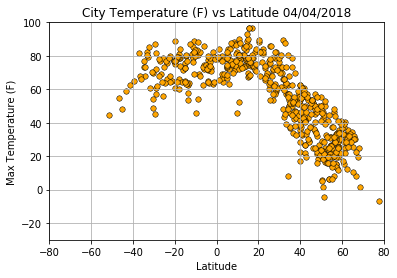

In [78]:
# plot scatterplot graph - City latitude vs temperature
date = time.strftime("%m/%d/%Y")
plt.scatter(cities_sample['Lat'],cities_sample['Max temp'], color="orange", edgecolor ="black", s = 30, label = "data", linewidth = 0.5)

plt.title(f"City Temperature (F) vs Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.xlim(-80,80)
plt.ylim(-30, 100)
plt.savefig("Temperature.png")
plt.show()

# Humidity (%) vs Latitude

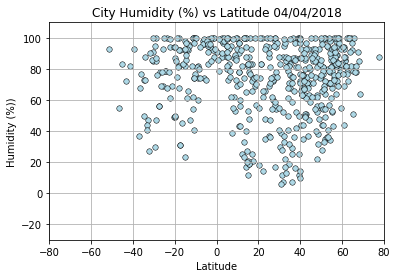

In [79]:
# plot scatterplot graph - City latitude vs humidity
date = time.strftime("%m/%d/%Y")
plt.scatter(cities_sample['Lat'],cities_sample['Humidity'], color="lightblue", edgecolor ="black", s = 30, label = "data", linewidth = 0.5)

plt.title(f"City Humidity (%) vs Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.xlim(-80,80)
plt.ylim(-30, 110)
plt.savefig("Humidity.png")
plt.show()

# Cloudiness (%) vs Latitude

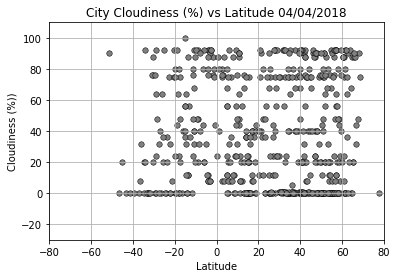

In [80]:
# plot scatterplot graph - City Latitude vs cloudiness
date = time.strftime("%m/%d/%Y")
plt.scatter(cities_sample['Lat'],cities_sample['Cloudiness'], color="grey", edgecolor ="black", s = 30, label = "data", linewidth = 0.5)

plt.title(f"City Cloudiness (%) vs Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(True)
plt.xlim(-80,80)
plt.ylim(-30, 110)
plt.savefig("Cloudiness.png")
plt.show()

# Wind speed (mph) vs Latitude

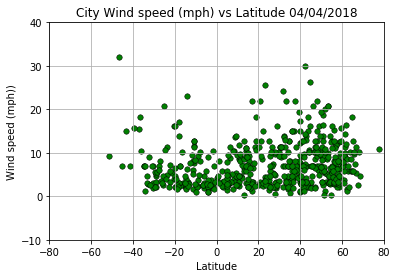

In [81]:
# plot scatterplot graph - City Latitude vs wind speed
date = time.strftime("%m/%d/%Y")
plt.scatter(cities_sample['Lat'],cities_sample['Wind speed'], color="green", edgecolor ="black", s = 30, label = "data", linewidth = 0.5)

plt.title(f"City Wind speed (mph) vs Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph))")
plt.grid(True)
plt.xlim(-80,80)
plt.ylim(-10, 40)
plt.savefig("Wind_speed.png")
plt.show()

# Cities location - Latitude vs Longitude

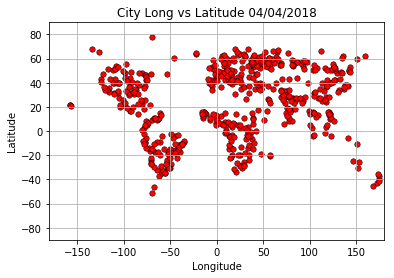

In [83]:
# plot scatterplot graph - City Latitude vs wind speed
date = time.strftime("%m/%d/%Y")
plt.scatter(cities_sample['Lng'], cities_sample['Lat'], color="red", edgecolor ="black", s = 30, label = "data", linewidth = 0.5)

plt.title(f"City Long vs Latitude {date}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.savefig("Latitude_vs_Longitude.png")
plt.show()